# 1. Import Libraries

In [1]:
!pip install pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data

Your data should be placed in the directory where this jupyter notebook is located

In [2]:
data = pd.read_csv('./H1.csv')
print('data shape : {}'.format(data.shape))
print('columns : \n {}'.format(list(data.columns)))

data shape : (40060, 31)
columns : 
 ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate']


In [3]:
data.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,0,0,2015,July,27,1,0,2,2,0,...,No Deposit,NULL,NULL,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,0,9,2015,July,27,1,0,2,2,0,...,No Deposit,303,NULL,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,1,85,2015,July,27,1,0,3,2,0,...,No Deposit,240,NULL,0,Transient,82.0,0,1,Canceled,2015-05-06
9,1,75,2015,July,27,1,0,3,2,0,...,No Deposit,15,NULL,0,Transient,105.5,0,0,Canceled,2015-04-22


# 3. Exploratory Data Analysis

## 3.1 How long have you been waiting?
Seems to have significant influence to IsCanceled

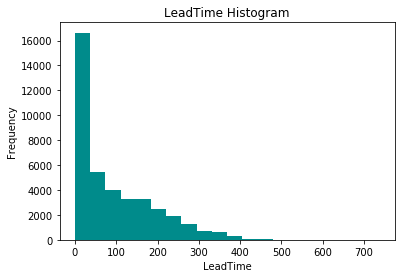

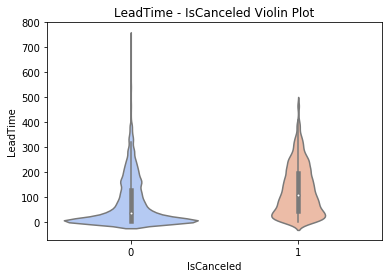

In [4]:
plt.hist(data['LeadTime'], color='darkcyan', bins=20)
plt.title('LeadTime Histogram')
plt.xlabel('LeadTime')
plt.ylabel('Frequency')
plt.show()
plt.close()

sns.set_palette(sns.color_palette("coolwarm", 2))
sns.violinplot(x="IsCanceled", y='LeadTime', data=data)
plt.title('LeadTime - IsCanceled Violin Plot')
plt.show()
plt.close()

## 3.2 Time-dependent Variables
* There seems to be an increasing trend of cancellation from year 2015 to 2017, but due to lack of historical data regarding years, it would be safe not to use this variable. Otherwise, the model will regard the cancellation will continue to increase in time, which might be a dangerous assumption to make.
* There seems to be a seasonal difference. Mainly, spring and summer months and weeks tend to have more cancellations
* The Day variable does not seem to have much effect.

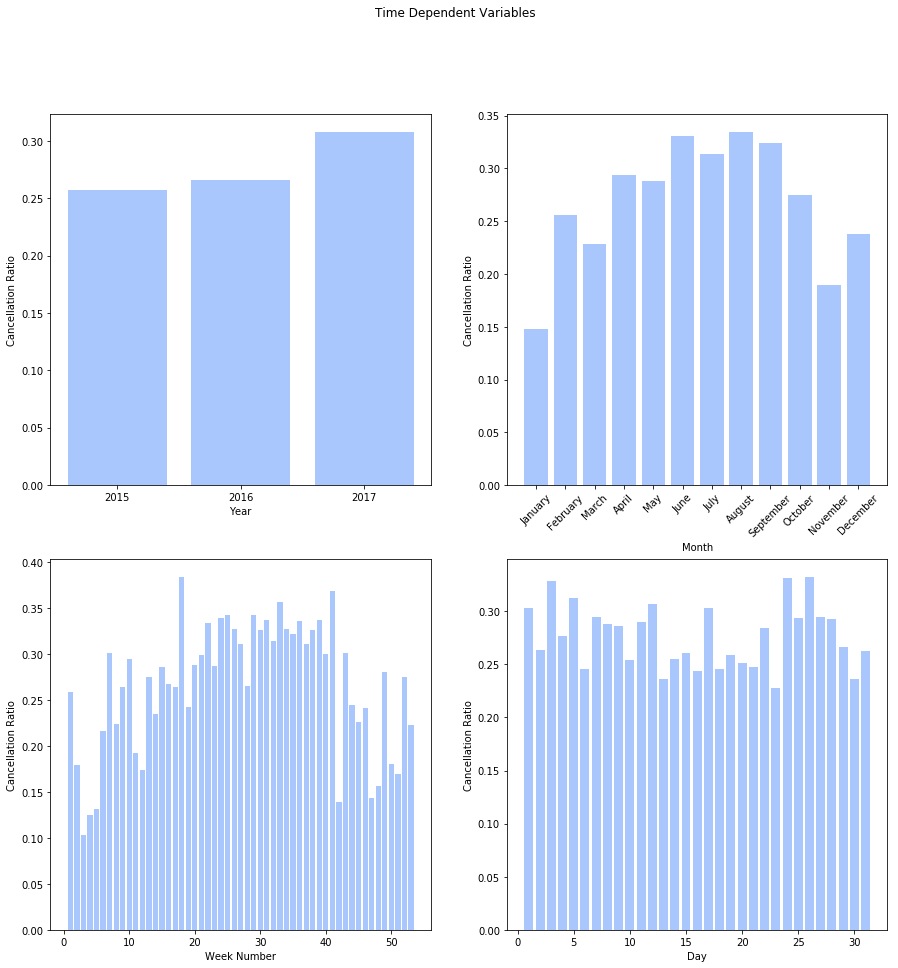

In [5]:
yearly_cancel_rate = data.groupby(data['ArrivalDateYear'])['IsCanceled'].mean()
monthly_cancel_rate = data.groupby(data['ArrivalDateMonth'])['IsCanceled'].mean()
monthly_cancel_rate = monthly_cancel_rate[['January','February','March','April','May','June','July','August',
                           'September','October','November','December']]
weekly_cancel_rate = data.groupby(data['ArrivalDateWeekNumber'])['IsCanceled'].mean()
daily_cancel_rate = data.groupby(data['ArrivalDateDayOfMonth'])['IsCanceled'].mean()

fig, ax = plt.subplots(2,2,figsize=(15,15))
fig.suptitle('Time Dependent Variables')
ax[0,0].bar(yearly_cancel_rate.index, yearly_cancel_rate)
ax[0,0].set_xticks([2015,2016,2017])
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Cancellation Ratio')

ax[0,1].bar(monthly_cancel_rate.index, monthly_cancel_rate)
ax[0,1].tick_params(axis='x',rotation=45)
ax[0,1].set_xlabel('Month')
ax[0,1].set_ylabel('Cancellation Ratio')


ax[1,0].bar(weekly_cancel_rate.index, weekly_cancel_rate)
ax[1,0].set_xlabel('Week Number')
ax[1,0].set_ylabel('Cancellation Ratio')

ax[1,1].bar(daily_cancel_rate.index, daily_cancel_rate)
ax[1,1].set_xlabel('Day')
ax[1,1].set_ylabel('Cancellation Ratio')
plt.show()
plt.close()

## 3.3 Weekend or Week?
These types of variables do not seem to be significant

In [6]:
data['weekend_week_rto'] = data['StaysInWeekendNights'] / data['StaysInWeekNights']
data['weekend_week_rto'] = data['weekend_week_rto'].fillna(0)

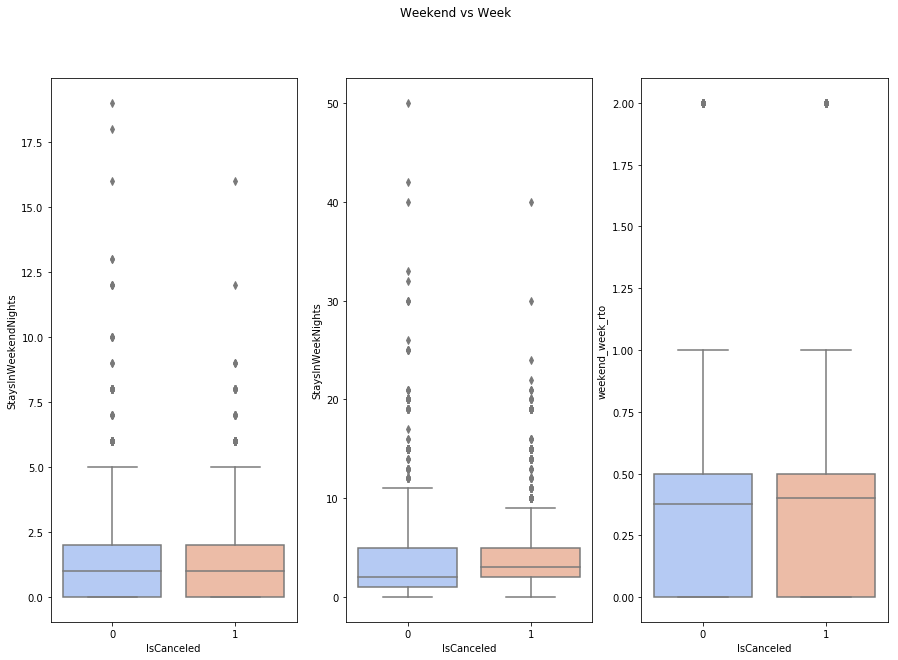

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,10))
fig.suptitle('Weekend vs Week')
sns.boxplot(ax=ax[0],x="IsCanceled", y='StaysInWeekendNights', data=data)
sns.boxplot(ax=ax[1],x="IsCanceled", y='StaysInWeekNights', data=data)
sns.boxplot(ax=ax[2],x="IsCanceled", y='weekend_week_rto', data=data)
plt.show()
plt.close()

## 3.4 Number of People
Generally, the more people you have, the more cancellation there may be. The difference is subtle, so we might as well simply aggregate the numbers of adults, children, and babies and make a new variable

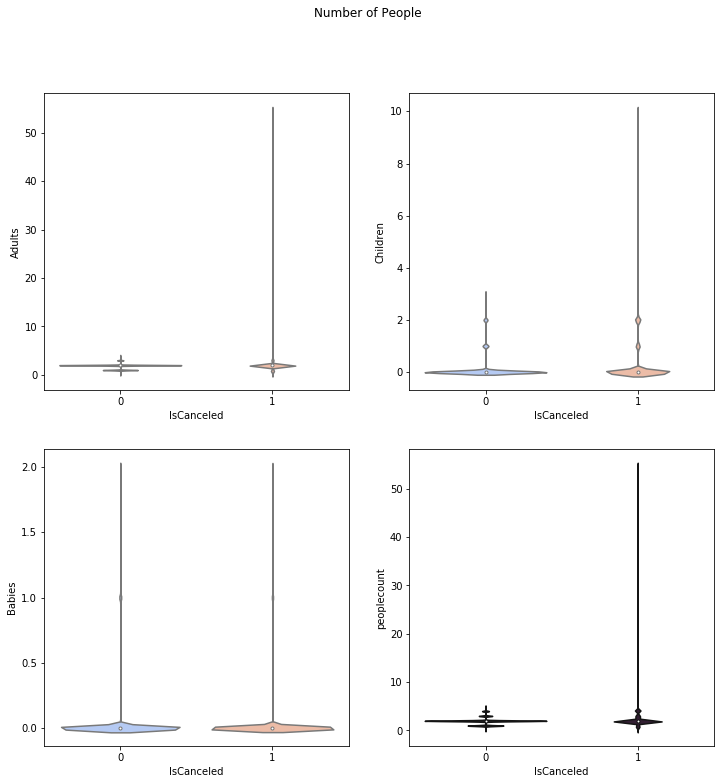

In [8]:
data['peoplecount'] = data['Adults'] + data['Children'] + data['Babies']
fig, ax = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Number of People')
sns.set_palette(sns.color_palette("coolwarm", 2))
sns.violinplot(ax=ax[0,0],x="IsCanceled", y='Adults', data=data)
sns.violinplot(ax=ax[0,1],x="IsCanceled", y='Children', data=data)
sns.violinplot(ax=ax[1,0],x="IsCanceled", y='Babies', data=data)
sns.set_palette(sns.dark_palette("purple"))
sns.violinplot(ax=ax[1,1],x="IsCanceled", y='peoplecount', data=data)
plt.show()
plt.close()

## 3.5 Meals
Interestingly, the meal type does seem to have effect.

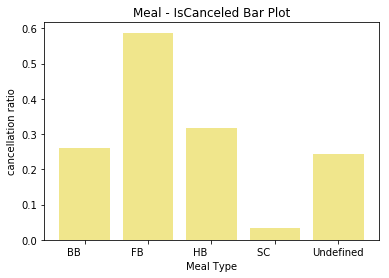

Meal
BB           30005
FB             754
HB            8046
SC              86
Undefined     1169
Name: Meal, dtype: int64


In [9]:
meal = data.groupby(data['Meal']).mean()['IsCanceled']
plt.bar(x=meal.index, height=meal.values, color='khaki')
plt.title('Meal - IsCanceled Bar Plot')
plt.xlabel('Meal Type')
plt.ylabel('cancellation ratio')
plt.show()
plt.close()

print(data['Meal'].groupby(data['Meal']).count())

## 3.6 Distribution Channel
People who have booked their rooms via Traveling Agents and Tour Operators had slightly greater

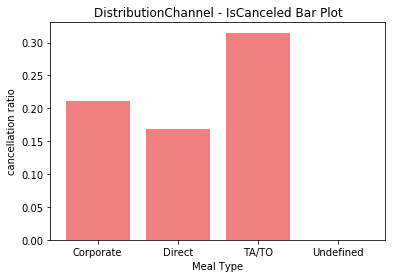

In [10]:
distchan = data.groupby(data['DistributionChannel']).mean()['IsCanceled']
plt.bar(x=distchan.index, height=distchan.values, color='lightcoral')
plt.title('DistributionChannel - IsCanceled Bar Plot')
plt.xlabel('Meal Type')
plt.ylabel('cancellation ratio')
plt.show()
plt.close()

## 3.7 Have you been here before?
If you have been here before, that means that you were satisfied with the services you've receieved the last time you were here. Therefore, a smaller rate of cancellations

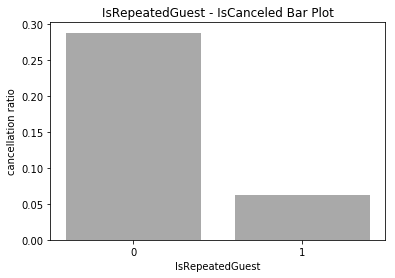

In [11]:
rep = data.groupby(data['IsRepeatedGuest']).mean()['IsCanceled']
plt.bar(x=rep.index, height=rep.values, color='darkgray')
plt.xticks([0,1])
plt.title('IsRepeatedGuest - IsCanceled Bar Plot')
plt.xlabel('IsRepeatedGuest')
plt.ylabel('cancellation ratio')
plt.show()
plt.close()

## 3.8 Past Cancellations
Of course... People don't change. If you have had cancellations, the more likely you'll cancel this time too :(

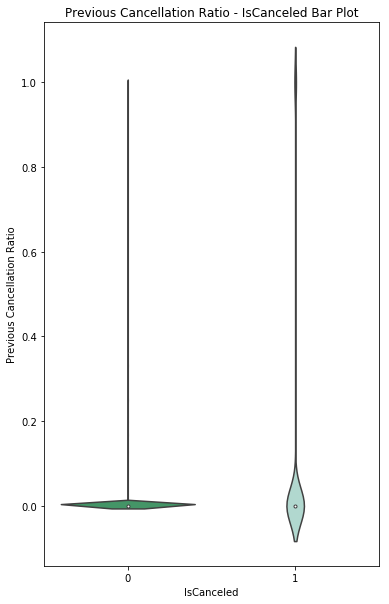

In [12]:
# With the PreeviousCancellations and PreviusBookingsNotCanceled variable, we may compute the ratio
cancel_rto = data['PreviousCancellations'] / (data['PreviousCancellations'] + data['PreviousBookingsNotCanceled'])
cancel_rto = cancel_rto.fillna(0)
data['Previous Cancellation Ratio'] = cancel_rto


sns.set_palette(sns.color_palette("BuGn_r", 2))
fig, ax = plt.subplots(1,1,figsize=(6,10))
plt.title('Previous Cancellation Ratio - IsCanceled Bar Plot')
sns.violinplot(x="IsCanceled", y='Previous Cancellation Ratio', data=data)
plt.show()
plt.close()

## 3.9 Reserved Room == Assigned Room ?

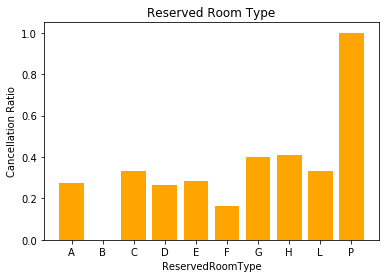

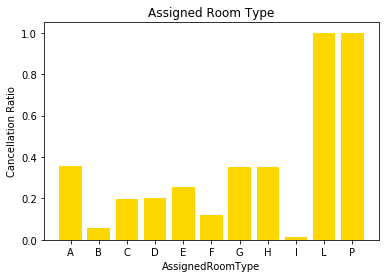

AssignedRoomType
A                   17046
B                     159
C                    2214
D                   10339
E                    5638
F                    1733
G                    1853
H                     712
I                     363
L                       1
P                       2
Name: AssignedRoomType, dtype: int64


In [13]:
roomtype = data.groupby(data['ReservedRoomType']).mean()['IsCanceled']
plt.bar(x=['A','B','C','D','E','F','G','H','L','P'], height=roomtype.values, color='orange')
plt.xticks()
plt.title('Reserved Room Type')
plt.xlabel('ReservedRoomType')
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()

roomtype = data.groupby(data['AssignedRoomType']).mean()['IsCanceled']
plt.bar(x=['A','B','C','D','E','F','G','H','I','L','P'], height=roomtype.values, color='gold')
plt.xticks()
plt.title('Assigned Room Type')
plt.xlabel('AssignedRoomType')
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()

print(data['AssignedRoomType'].groupby(data['AssignedRoomType']).count())

P and L does seem to be significant, but considering just a few occurrence of them in the dataset, we'd better ignore them.

Rather, we might want to take a look at the relation between IsCanceled and the whether the assigned room is different from what was reserved.

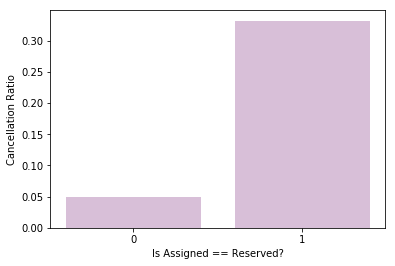

In [14]:
# check if assigned room has changed
data['SameRoomType'] = (data['ReservedRoomType'] == data['AssignedRoomType']).apply(lambda x: int(x))

sameroom = data.groupby(data['SameRoomType']).mean()['IsCanceled']
plt.bar(x=sameroom.index, height=sameroom.values, color='thistle')
plt.xticks([0,1])
plt.xlabel('Is Assigned == Reserved?')
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()

A rather unintuitive result. If assigned room is same with what has been reserved, people tend to have more cancellations. Both cases have plenty of occurrences in the dataset, so the law of big numbers applies to both cases. We wonder why.. But, we're not looking for causation here. If the data says so, it is what it is.

## 3.10 Booking Changes
There doesn't seem to be much significance.

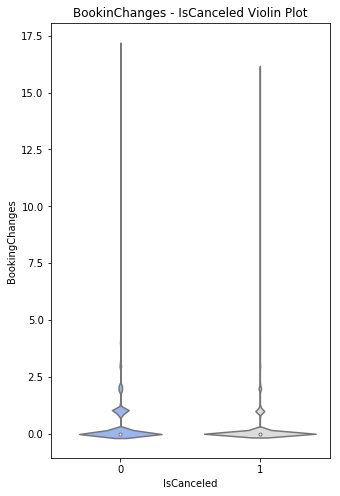

In [15]:
_, ax = plt.subplots(figsize=(5,8))
sns.set_palette(sns.color_palette("coolwarm", 3))
sns.violinplot(x="IsCanceled", y='BookingChanges', data=data)
plt.title('BookinChanges - IsCanceled Violin Plot')
plt.show()
plt.close()

## 3.11 Payment Condition
Another unintuitive result... How come Non-Refund has higher rate of cancellation? And an interesting thing is that the Non Refund instance has more than 1700 occurrences, which means that the cancellation ratio did not happen to be near 1.0 by chance. Maybe the hotel stipulated a non-refund in the time period where most of the people tend to cancel their reservations.

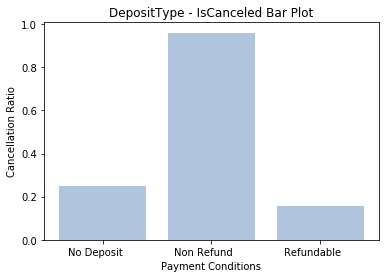

In [16]:
deptype = data.groupby(data['DepositType']).mean()['IsCanceled']
plt.bar(x=deptype.index, height=deptype.values, color='lightsteelblue')
plt.title('DepositType - IsCanceled Bar Plot')
plt.xlabel('Payment Conditions')
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()

In [17]:
data['DepositType'].groupby(data['DepositType']).count()

DepositType
No Deposit         38199
Non Refund          1719
Refundable           142
Name: DepositType, dtype: int64

## 3.12 How long have you been in line?
Having been waiting long in the waiting list means that you really need to reserve the room in this hotel. And obviously, you don't want to cancel after waiting a half a year in line, do you?

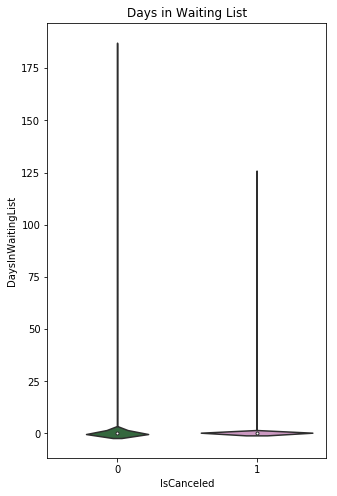

In [18]:
_, ax = plt.subplots(figsize=(5,8))
sns.set_palette(sns.color_palette("cubehelix", 2))
sns.violinplot(x="IsCanceled", y='DaysInWaitingList', data=data)
plt.title('Days in Waiting List')
plt.show()
plt.close()

## 3.13 Customer Type
Generally, transient customer(s) will tend to cancel more often.

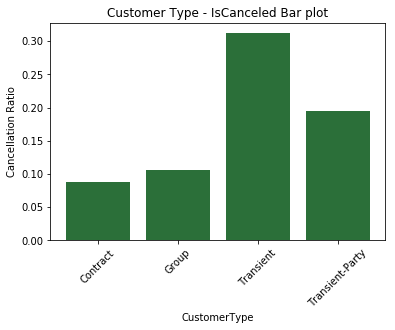

CustomerType
Contract            1776
Group                284
Transient          30209
Transient-Party     7791
Name: IsCanceled, dtype: int64


In [19]:
custtype = data.groupby(data['CustomerType']).mean()['IsCanceled']
plt.bar(x=custtype.index, height=custtype.values)
plt.xticks(rotation=45)
plt.title('Customer Type - IsCanceled Bar plot')
plt.xlabel("CustomerType")
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()
print(data.groupby(data['CustomerType']).count()['IsCanceled'])

## 3.14 Average Daily Rate (ADR)
Doesn't seem influential.

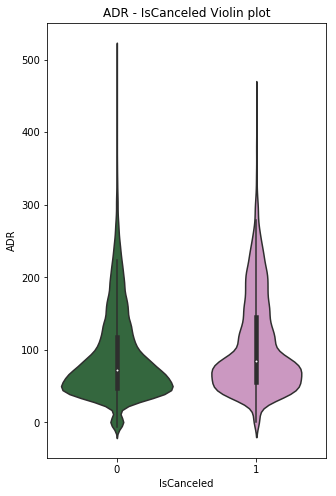

In [20]:
_, ax = plt.subplots(figsize=(5,8))
sns.violinplot(x="IsCanceled", y='ADR', data=data)
plt.title('ADR - IsCanceled Violin plot')
plt.show()
plt.close()

## 3.15 Parking Space Requested
Maybe there are some significant correlations between requested parking spaces and the number of people coming?

In [21]:
data[['RequiredCarParkingSpaces', 'peoplecount']].corr()

,RequiredCarParkingSpaces,peoplecount
RequiredCarParkingSpaces,1.000000,0.039676
peoplecount,0.039676,1.000000


Nope, ABSOLUTELY no correlation.

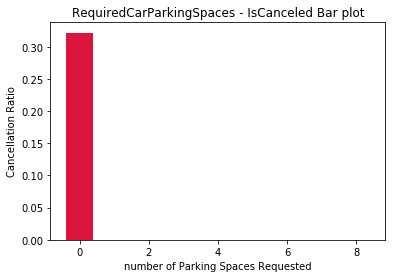

In [22]:
parking = data.groupby(data['RequiredCarParkingSpaces']).mean()['IsCanceled']
plt.bar(x=parking.index, height=parking.values, color='crimson')
plt.title('RequiredCarParkingSpaces - IsCanceled Bar plot')
plt.xlabel('number of Parking Spaces Requested')
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()

Hmm.. Interesting. If you requested for any amount of parking spaces, you did not cancel your reservation. This is somewhat reasonable. Requesting for parking spaces may signify you are definitely scheduled to come.

For simplicity, maybe we should make this into a binary variable : 0 parking space / non-zero parking space

## 3.16 Number of Specific Requests
Generally, the more specific your request (such as twin beds, more towels etc..), the higher chance that you are determined to visit. Similar logic applied to that of section 3.15

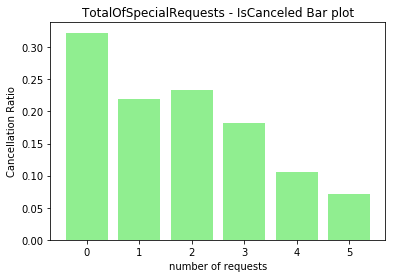

In [23]:
specreq = data.groupby(data['TotalOfSpecialRequests']).mean()['IsCanceled']
plt.bar(x=specreq.index, height=specreq.values, color='lightgreen')
plt.xlabel('number of requests')
plt.ylabel('Cancellation Ratio')
plt.title('TotalOfSpecialRequests - IsCanceled Bar plot')
plt.show()
plt.close()

## 3.17 Market Segment
Cetain types of market segment does seem to have higher cancellation ratios

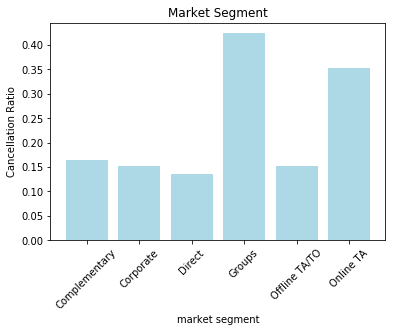

MarketSegment
Complementary      201
Corporate         2309
Direct            6513
Groups            5836
Offline TA/TO     7472
Online TA        17729
Name: MarketSegment, dtype: int64


In [24]:
marketseg = data.groupby(data['MarketSegment']).mean()['IsCanceled']
plt.bar(x=marketseg.index, height=marketseg.values, color='lightblue')
plt.xticks(rotation=45)
plt.title('Market Segment')
plt.xlabel('market segment')
plt.ylabel('Cancellation Ratio')
plt.show()
plt.close()

print(data['MarketSegment'].groupby(data['MarketSegment']).count())

## 3.17 Finally, our Target Variable
0 means the reservation was not cancelled, and 1 means reservation was cancelled.

In [25]:
np.unique(data['IsCanceled'])

array([0, 1], dtype=int64)

# 4. Preprocessing
## 4.1 Preprocess Features

In [26]:
# month to season
spr_sum = ['March','April','May','June','July','August']  # 1
fal_win = ['September','October','November','December','January','February']  # 0
data['ArrivalSeason'] = data['ArrivalDateMonth'].apply(lambda x : int(x in spr_sum))

# Reduce Marketsegment
ones = ['Online TA','Groups']
data['MarketSegENC'] = data['MarketSegment'].apply(lambda x : int(x in ones))

# Deposit type to binary : Non-refundable or Not
data['NonRefundable'] = data['DepositType'].apply(lambda x : int(x == 'Non Refund'))

# Transient Customers or Not
ones = ['Transient','Transient-Party']
data['TransientCust'] = data['CustomerType'].apply(lambda x : int(x in ones))

# Required Parking Space or Not
data['NeedParking'] = data['RequiredCarParkingSpaces'].apply(lambda x : int(x != 0))

## 4.2 Feature Selection

In [27]:
usecols = ['IsCanceled','LeadTime','ArrivalSeason','peoplecount','Meal','MarketSegENC','DistributionChannel',
           'IsRepeatedGuest','Previous Cancellation Ratio','SameRoomType','NonRefundable','DaysInWaitingList',
           'TransientCust','NeedParking']
data = data[usecols]
data.head()

,IsCanceled,LeadTime,ArrivalSeason,peoplecount,Meal,MarketSegENC,DistributionChannel,IsRepeatedGuest,Previous Cancellation Ratio,SameRoomType,NonRefundable,DaysInWaitingList,TransientCust,NeedParking
0,0,342,1,2,BB,0,Direct,0,0.0,1,0,0,1,0
1,0,737,1,2,BB,0,Direct,0,0.0,1,0,0,1,0
2,0,7,1,1,BB,0,Direct,0,0.0,0,0,0,1,0
3,0,13,1,1,BB,0,Corporate,0,0.0,1,0,0,1,0
4,0,14,1,2,BB,1,TA/TO,0,0.0,1,0,0,1,0


## 4.3 To Dummy Variables (One-Hot Variables)
We did not set drop_first=True for interpretability

In [28]:
data_oh = pd.get_dummies(data, columns=['Meal','DistributionChannel'])
data_oh.head()

,IsCanceled,LeadTime,ArrivalSeason,peoplecount,MarketSegENC,IsRepeatedGuest,Previous Cancellation Ratio,SameRoomType,NonRefundable,DaysInWaitingList,...,NeedParking,Meal_BB,Meal_FB,Meal_HB,Meal_SC,Meal_Undefined,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_TA/TO,DistributionChannel_Undefined
0,0,342,1,2,0,0,0.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,737,1,2,0,0,0.0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,7,1,1,0,0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,13,1,1,0,0,0.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,14,1,2,1,0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


## 4.4 Splitting the Data

In [29]:
X = data_oh.iloc[:,1:]
y = data_oh.iloc[:,0]
print('X shape : {}'.format(X.shape))
print('y shape : {}'.format(y.shape))

X shape : (40060, 20)
y shape : (40060,)


In [30]:
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.25, random_state=1234)
print('Train X shape : {}'.format(trainx.shape))
print('Train y shape : {}'.format(trainy.shape))
print('Test X shape : {}'.format(testx.shape))
print('Test y shape : {}'.format(testy.shape))

Train X shape : (30045, 20)
Train y shape : (30045,)
Test X shape : (10015, 20)
Test y shape : (10015,)


## 4.5 Standardize Input Scales

In [31]:
scaler = StandardScaler()
trainx_scaled = scaler.fit_transform(trainx)
testx_scaled = scaler.transform(testx)

# 5. Modeling
We decided to experiment on three different models and pick the best model

## 5.1 Logistic Regression

In [32]:
lr = LogisticRegression(max_iter=1000)
lr.fit(trainx_scaled, trainy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
tr_pred = lr.predict(trainx_scaled)
te_pred = lr.predict(testx_scaled)
print('Train Accuracy = {}'.format(accuracy_score(tr_pred, trainy)))
print('Test Accuracy = {}'.format(accuracy_score(te_pred, testy)))
print(classification_report(te_pred, testy))

Train Accuracy = 0.7705109003161924
Test Accuracy = 0.7752371442835746
              precision    recall  f1-score   support

           0       0.91      0.80      0.86      8327
           1       0.40      0.63      0.49      1688

   micro avg       0.78      0.78      0.78     10015
   macro avg       0.65      0.72      0.67     10015
weighted avg       0.83      0.78      0.79     10015



## 5.2 Decision Tree

In [34]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6
)

dt_res = dt.fit(trainx_scaled, trainy)

In [35]:
tr_pred = dt.predict(trainx_scaled)
te_pred = dt.predict(testx_scaled)
print('Train Accuracy = {}'.format(accuracy_score(tr_pred, trainy)))
print('Test Accuracy = {}'.format(accuracy_score(te_pred, testy)))
print(classification_report(te_pred, testy))

Train Accuracy = 0.7730071559327675
Test Accuracy = 0.7760359460808787
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      6593
           1       0.72      0.56      0.63      3422

   micro avg       0.78      0.78      0.78     10015
   macro avg       0.76      0.73      0.74     10015
weighted avg       0.77      0.78      0.77     10015



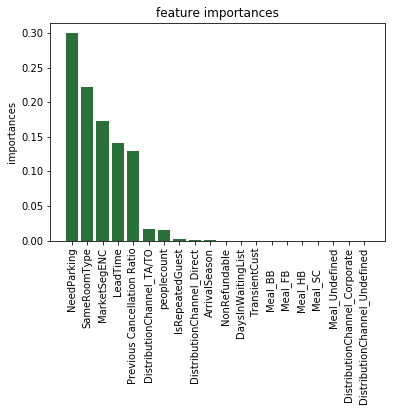

In [36]:
fi = pd.DataFrame({
    'features' : list(trainx.columns),
    'feature_importances' : dt.feature_importances_
})

fi = fi.sort_values(by='feature_importances', ascending=False)
plt.bar(height=fi['feature_importances'], x=fi['features'])
plt.title('feature importances')
plt.ylabel('importances')
plt.xticks(rotation=90)
plt.show()
plt.close()

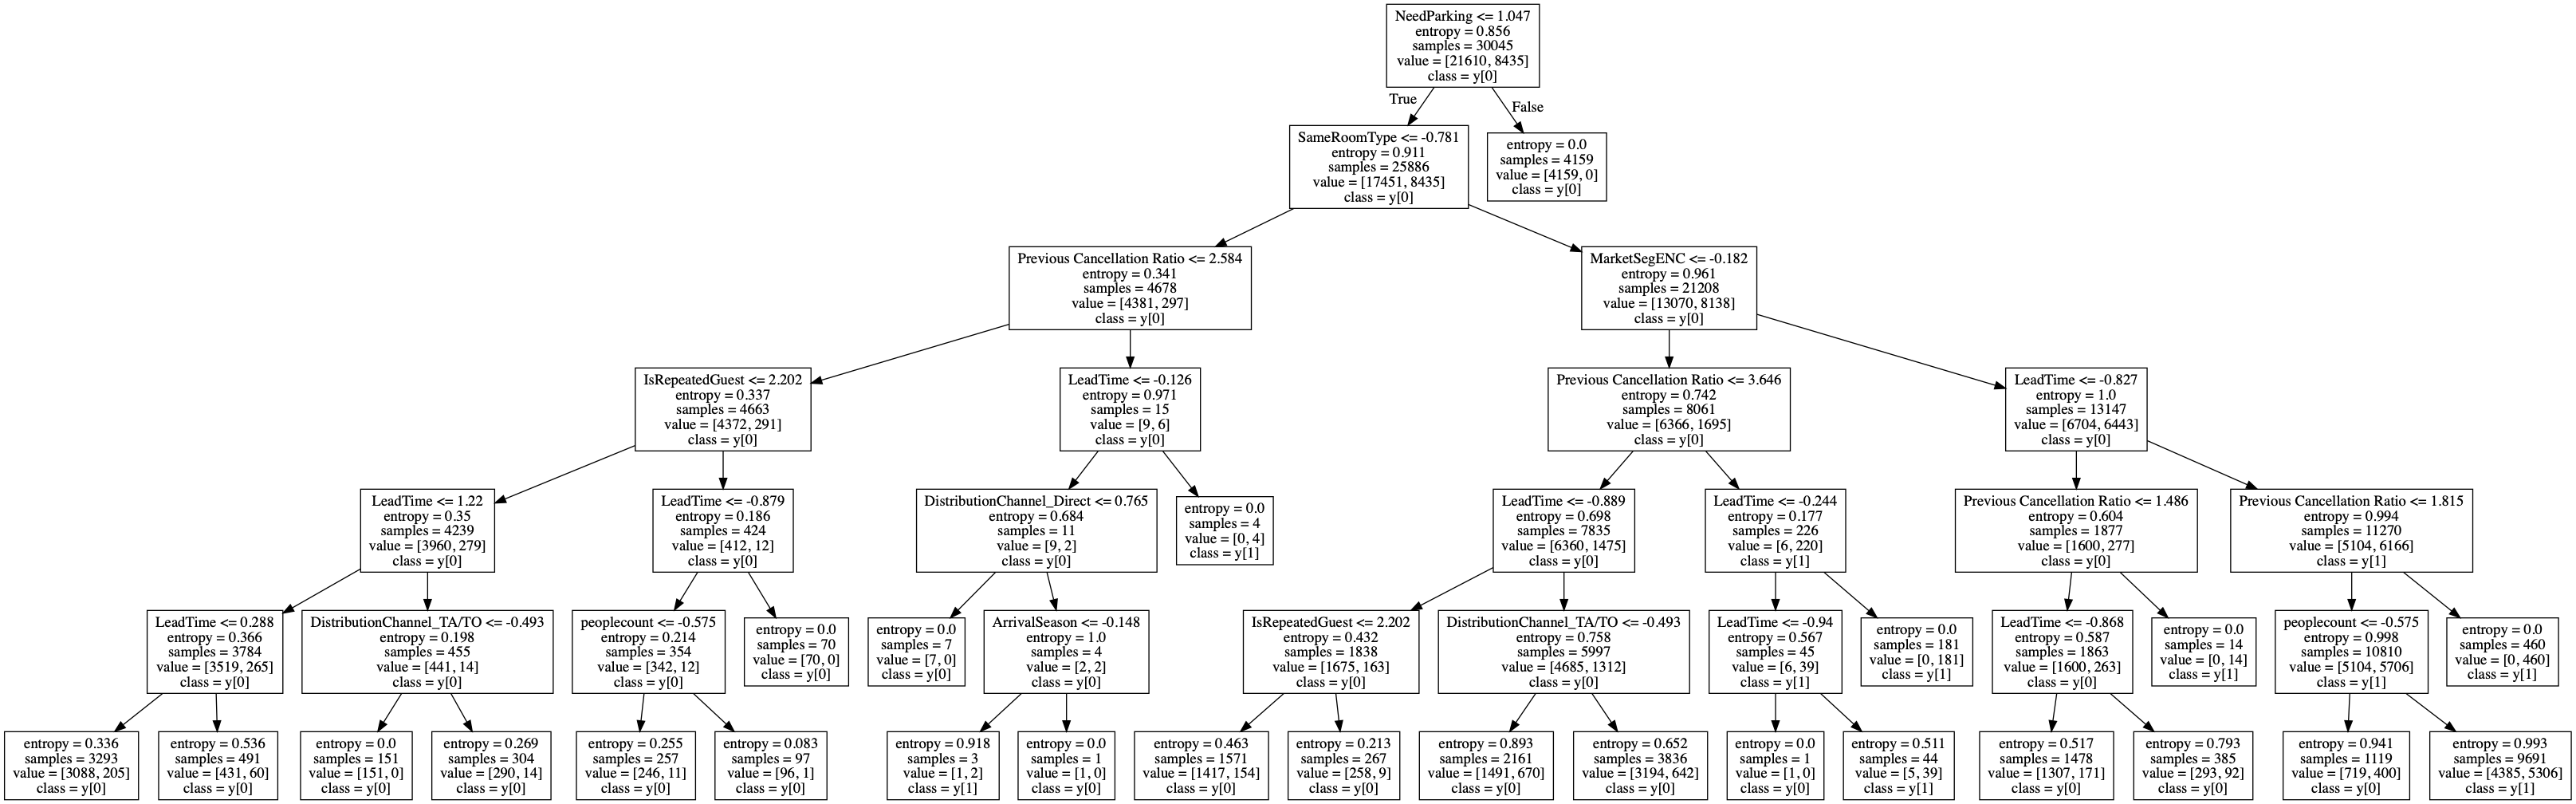

In [37]:
dot_data = export_graphviz(dt_res, out_file=None, feature_names=trainx.columns, class_names=True)
dt_viz = pydotplus.graph_from_dot_data(dot_data)
Image(dt_viz.create_png())

## 5.3 MLP Classifier

In [38]:
mlp = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(64,32),
    learning_rate_init=0.001,
    shuffle=True,
    verbose=True
)

mlp.fit(trainx_scaled, trainy)

Iteration 1, loss = 0.57810585
Iteration 2, loss = 0.48540260
Iteration 3, loss = 0.44647784
Iteration 4, loss = 0.44074938
Iteration 5, loss = 0.43897194
Iteration 6, loss = 0.43819199
Iteration 7, loss = 0.43720113
Iteration 8, loss = 0.43648617
Iteration 9, loss = 0.43536564
Iteration 10, loss = 0.43453006
Iteration 11, loss = 0.43377150
Iteration 12, loss = 0.43308358
Iteration 13, loss = 0.43215130
Iteration 14, loss = 0.43132114
Iteration 15, loss = 0.43102690
Iteration 16, loss = 0.43054724
Iteration 17, loss = 0.42931437
Iteration 18, loss = 0.42923601
Iteration 19, loss = 0.42898276
Iteration 20, loss = 0.42826971
Iteration 21, loss = 0.42759681
Iteration 22, loss = 0.42730738
Iteration 23, loss = 0.42669419
Iteration 24, loss = 0.42646873
Iteration 25, loss = 0.42655079
Iteration 26, loss = 0.42567439
Iteration 27, loss = 0.42528110
Iteration 28, loss = 0.42505317
Iteration 29, loss = 0.42457717
Iteration 30, loss = 0.42399924
Iteration 31, loss = 0.42411588
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [39]:
tr_pred = mlp.predict(trainx_scaled)
te_pred = mlp.predict(testx_scaled)
print('Train Accuracy = {}'.format(accuracy_score(tr_pred, trainy)))
print('Test Accuracy = {}'.format(accuracy_score(te_pred, testy)))
print(classification_report(te_pred, testy))

Train Accuracy = 0.799567315693127
Test Accuracy = 0.801697453819271
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7126
           1       0.67      0.62      0.64      2889

   micro avg       0.80      0.80      0.80     10015
   macro avg       0.76      0.75      0.75     10015
weighted avg       0.80      0.80      0.80     10015



## 5.4 K Fold Cross Validation with Decision Tree

In [40]:

dt = DecisionTreeClassifier(
    criterion='entropy',
)

tr_accs = []
te_accs = []
kfold = KFold(n_splits=10)
for idx, (tr_idx, te_idx) in enumerate(kfold.split(X)) :
    trainX = X.iloc[tr_idx, :]
    testX = X.iloc[te_idx, :]
    trainy = y.iloc[tr_idx]
    testy = y.iloc[te_idx]
    
    scaler = StandardScaler()
    trainX = scaler.fit_transform(trainX)
    testX = scaler.transform(testX)
    
    dt.fit(trainX, trainy)
    tr_pred = dt.predict(trainX)
    te_pred = dt.predict(testX)
    
    tr_acc = accuracy_score(tr_pred, trainy)
    te_acc = accuracy_score(te_pred, testy)
    tr_accs.append(tr_acc)
    te_accs.append(te_acc)
    print('Fold {} : Train Accuracy = {}'.format(idx+1, tr_acc))
    print('Fold {} : Test Accuracy = {}'.format(idx+1, te_acc))
    print()

print('K Fold Accuracy Mean : {}'.format(np.mean(te_accs)))
print('K Fold Accuracy Standard Deviation : {}'.format(np.std(te_accs)))

Fold 1 : Train Accuracy = 0.8854773395462362
Fold 1 : Test Accuracy = 0.6357963055416874

Fold 2 : Train Accuracy = 0.8978754091085593
Fold 2 : Test Accuracy = 0.4131303045431852

Fold 3 : Train Accuracy = 0.9037277417207522
Fold 3 : Test Accuracy = 0.2616075886170744

Fold 4 : Train Accuracy = 0.8802074665779109
Fold 4 : Test Accuracy = 0.6757363954068897

Fold 5 : Train Accuracy = 0.8673101458922727
Fold 5 : Test Accuracy = 0.8959061407888168

Fold 6 : Train Accuracy = 0.8698618738558829
Fold 6 : Test Accuracy = 0.8674488267598602

Fold 7 : Train Accuracy = 0.8773783768791258
Fold 7 : Test Accuracy = 0.7848227658512231

Fold 8 : Train Accuracy = 0.8738281466688855
Fold 8 : Test Accuracy = 0.7695956065901148

Fold 9 : Train Accuracy = 0.8743551339657181
Fold 9 : Test Accuracy = 0.7648527209186221

Fold 10 : Train Accuracy = 0.8810118156099185
Fold 10 : Test Accuracy = 0.6979530703944083

K Fold Accuracy Mean : 0.6766849725411882
K Fold Accuracy Standard Deviation : 0.18879192285216956

# 6. Brief Conclusion

As far as we have done, the MLP Classifier has done the best in terms of accuracy. It had 80.0% of accuracy in the test set. However, the precision, recall, and f1 score metric signifies that both MLP Classifier and Logistic Regression did a poor job in predicting label 1, which is 'canceled'. Relatively, the Decision Tree Classifier did a decent job in terms of f1 score. Thus, we select the **Decision Tree** as our final model for this team project. To have a closer look, we also carried out a K-fold cross validation with the decision tree with k=10. We got an average accuracy of 67.67% but the standard deviation of accuracies were quite high.

The poor performance in terms of f1 score may be due to an imbalance in labels. In our individual projects, we will each try to tackle such issues.

**To be continued...**
